**IMPORTING DATA**

In [1]:
# Importing Numpy, Pandas, and Dataset.

import numpy as np
import pandas as pd
df = pd.read_csv('diabetic_readmission_data.csv')
pd.options.display.max_columns = None

In [2]:
# Examine data types and descriptive stats.
# Observations:
# - 50 total columns
# - Some columns seem irrelevant to analysis of project (e.g. payer_code, number_diagnoses) 
# - 37 object dtypes, 13 int dtypes

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [3]:
# Observations:
# - Weight column is missing 98% of data
# - Payer code column is missing 52% of data
# - Medical specialty column is missing 53% of data

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Original dataframe includes 101,766 rows & 50 columns.

df.shape

(101766, 50)

**DATA CLEANING**

In [5]:
# Dropping any potential duplicate rows that might skew any data analysis.
# Multiple encounters for same patient will skew data.

df = df.drop_duplicates(subset='patient_nbr', keep='first')

In [6]:
# Confirming changes made after duplicate patient encounter removal.

df.shape

(71518, 50)

In [7]:
# Removing columns that have incomplete data or unuseful data points.

df = df.drop(['weight', 'payer_code', 'medical_specialty', 'diag_2', 'diag_3'], axis=1)

In [8]:
# Confirming changes made after column removal.

df.shape

(71518, 45)

In [9]:
# Removing patients who died during hospital admission or discharged to hospice care
# since these patients would not be readmitted again.

df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]


In [10]:
# Removing patients with missing Race values since we are using this as a data point for analysis.

df = df.loc[~df.race.isin(['?'])]

In [11]:
# Confirming changes made after missing Race value removal.

df.shape

(68055, 45)

In [12]:
# Removing patients with missing Gender values or unknown values
# since we are using this as a data point for analysis.

df = df.loc[~df.gender.isin(['Unknown/Invalid'])]

In [13]:
# Confirming changes made after missing Gender value removal.

df.shape

(68054, 45)

**FEATURE ENGINEERING**

In [14]:
# Creating new column to show number of medication changes made for each patient.

keys = ['metformin','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
        'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 
        'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 
        'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 
        'acetohexamide', 'examide', 'citoglipton', ]

for x in keys:
    colname = str(x) + 'temp'
    df[colname] = df[x].apply(lambda y: 0 if (y == 'No' or y == 'Steady') else 1)
    
df['medchange'] = 0

for x in keys:
    colname = str(x) + 'temp'
    df['medchange'] += df[colname]
    del df[colname]

In [15]:
df['examide'].value_counts()

No    68054
Name: examide, dtype: int64

In [16]:
# # Engineer new features for total number of medications prescribed
dict_values = {'No': 0, 'Steady':1, 'Up':1, 'Down':1}
df['total_medications'] = 0

for x in keys:
    colname = str(x) + 'temp'
    df[colname] = df[x].map(dict_values)
    df['total_medications'] = df['total_medications'] + df[colname]
    del df[colname]

In [17]:
df.total_medications.value_counts()

1    30257
0    16319
2    14959
3     5486
4      980
5       49
6        4
Name: total_medications, dtype: int64

In [18]:
# Clean age column to fit into integer bins

age_dict= {'[0-10)': 0, '[10-20)': 10, '[20-30)': 20, '[30-40)':30, 
 '[40-50)':40, '[50-60)':50,'[60-70)':60, '[70-80)':70, 
 '[80-90)':80, '[90-100)':90  }

df['age'] = df['age'].map(age_dict)

In [19]:
# Change Readmission to True False Boolean. The Problem is hospital knowledge within 30 days.
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)
df.readmitted.value_counts(normalize = True)

0    0.909836
1    0.090164
Name: readmitted, dtype: float64

In [20]:
# df = (df.loc[~df.diag_1.isin(['?'])])

In [21]:
# df['diag_cat'] = df['diag_1']
# df.loc[df['diag_1'].str.contains('V'), ['diag_cat']] = 0
# df.loc[df['diag_1'].str.contains('E'), ['diag_cat']] = 0
# 
# df['diag_cat'] = df['diag_cat'].astype(float)
# 
# for x in df['diag_cat']:
#     if x >= 390 and x <=459 or x == 785:
#         df['diag_cat'] = 'Circulatory'
#     if x >= 460 and x <=519 or x == 786:
#         df['diag_cat'] = 'Respiratory'
#     else:
#         df['diag_cat'] = 'Other'


In [22]:
# df.diag_1.where(x > 390)
# df.head()

**Visualizations**

In [23]:
# Import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Percentage of Readmission By Gender and Age')

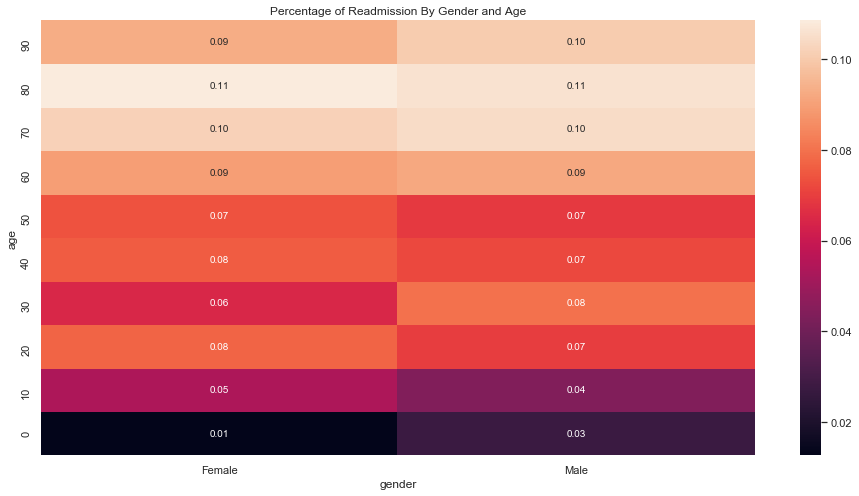

In [24]:
# sns.lmplot('age', 'medchange', data=df, hue='readmitted', fit_reg=False);
plt.figure(figsize=(16, 8))

ax = plt.axes()

data = df.pivot_table(index='age', columns='gender', values='readmitted')
sns.heatmap(data, annot=True, fmt=".2f").invert_yaxis()
ax.set_title('Percentage of Readmission By Gender and Age')


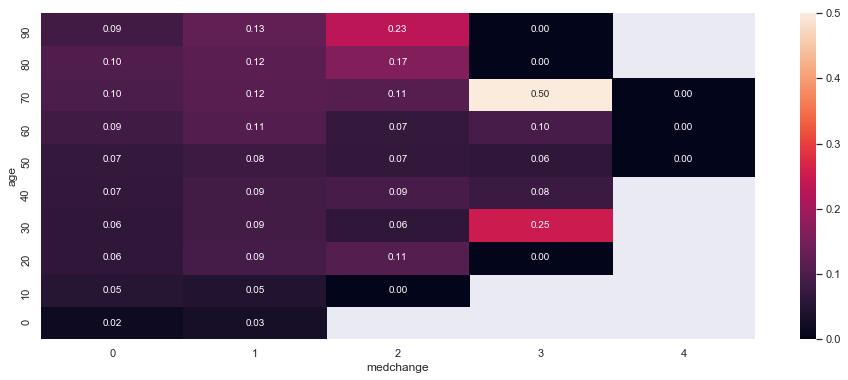

In [25]:
plt.figure(figsize=(16, 6))


data = df.pivot_table(index='age', columns='medchange', values='readmitted')
sns.heatmap(data, annot=True, fmt=".2f").invert_yaxis();

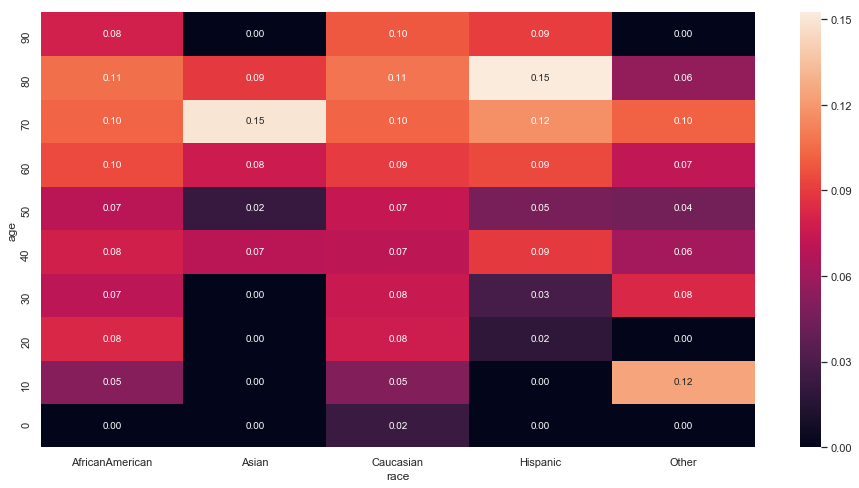

In [26]:
plt.figure(figsize=(16, 8))


data = df.pivot_table(index='age', columns='race', values='readmitted')
sns.heatmap(data, annot=True, fmt=".2f").invert_yaxis();

In [27]:
df1 = (df.loc[df.readmitted.isin([True])])
data2 = (df.loc[df.readmitted.isin([False])])
AfricanAmerican = df1.loc[df1.race.isin(['AfricanAmerican'])]
Hispanic = df1.loc[df1.race.isin(['Hispanic'])]
Caucasian = df1.loc[df1.race.isin(['Caucasian'])]
Asian = df1.loc[df1.race.isin(['Asian'])]
Other = df1.loc[df1.race.isin(['Other'])]
Other_Count = list(Other.groupby(['age'])['readmitted'].count())

# d2 = list(data2['age'])
# d1r = list(data1['race'])
# d2r = list(data2['race'])

In [28]:
df0=df.gender.value_counts()
df0

Female    36262
Male      31792
Name: gender, dtype: int64

Text(0.5, 1.0, 'Percentage of Readmittance by Age and Race')

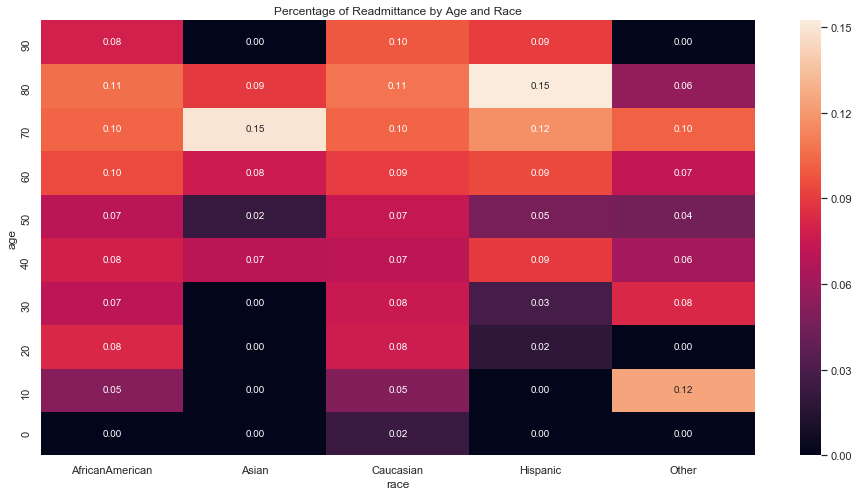

In [29]:
plt.figure(figsize=(16, 8))


data = df.pivot_table(index='age', columns='race', values='readmitted')
sns.heatmap(data, annot=True, fmt=".2f").invert_yaxis()
plt.title('Percentage of Readmittance by Age and Race')

In [30]:
# Set x and y values to plot Readmittance by age and race in bar graph

x = df['age'].unique()
y1 = AfricanAmerican.groupby(['age'])['readmitted'].count()
y2 = Hispanic.groupby(['age'])['readmitted'].count()
y3 = Caucasian.groupby(['age'])['readmitted'].count()
y4 = Asian.groupby(['age'])['readmitted'].count()
y5 = Other.groupby(['age'])['readmitted'].count()


In [33]:
print(y1, y2, y3, y4, y5)
#The y values are missing values in some of the age bins.
#This is because there is no data to report in those age ranges
#Will need to add them as zeros

age
10      8
20     31
30     59
40    146
50    200
60    263
70    248
80    120
90     18
Name: readmitted, dtype: int64 age
20     1
30     4
40    21
50    15
60    32
70    32
80    16
90     1
Name: readmitted, dtype: int64 age
0        3
10      17
20      49
30     118
40     312
50     631
60    1058
70    1456
80    1014
90     143
Name: readmitted, dtype: int64 age
40     3
50     2
60     9
70    21
80     6
Name: readmitted, dtype: int64 age
10     1
30     5
40     8
50    11
60    23
70    25
80     6
Name: readmitted, dtype: int64


In [34]:
x = df['age'].unique()
y1 = list(AfricanAmerican.groupby(['age'])['readmitted'].count())
y2 = list(Hispanic.groupby(['age'])['readmitted'].count())
y3 = list(Caucasian.groupby(['age'])['readmitted'].count())
y4 = list(Asian.groupby(['age'])['readmitted'].count())
y5 = list(Other.groupby(['age'])['readmitted'].count())

In [35]:
y1.insert(0, 0)
y2.insert(0, 0)
y2.insert(1, 0)
y4.insert(0, 0)
y4.insert(1, 0)
y4.insert(2, 0)
y4.insert(3, 0)
y4.insert(9, 0)
y5.insert(0, 0)
y5.insert(2, 0)
y5.insert(9, 0)

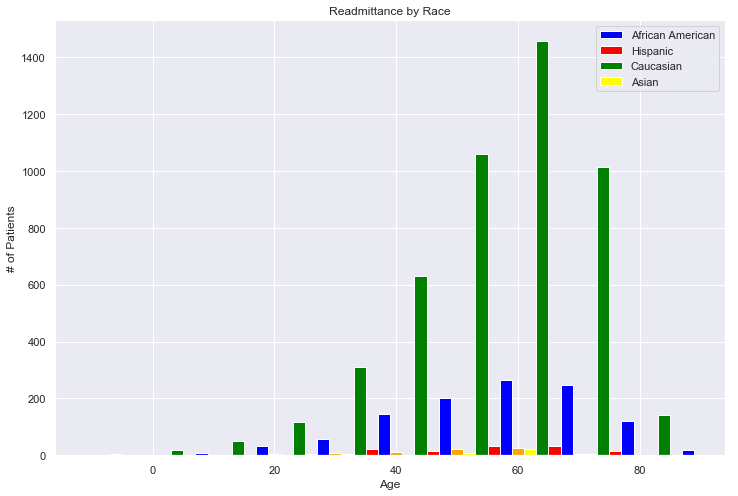

In [36]:

fig = plt.figure(figsize = (12,8))


# y= list(female.loc[(female['readmitted'] == 1)].groupby(['age', 'gender', 'readmitted'])['patient_nbr'].count())
width = 2
plt.bar(x - width, y1, width, color = 'blue')
plt.bar(x - width*2, y2, width = 2, color = 'red')
plt.bar(x - width*3, y3, width = 2, color = 'green')
plt.bar(x - width*4, y4, width = 2, color = 'yellow')
plt.bar(x - width*5, y5, width = 2, color = 'orange')


plt.title('Readmittance by Race')
plt.xlabel('Age')
plt.ylabel('# of Patients')
plt.legend(['African American','Hispanic', 'Caucasian', 'Asian'])
plt.show()

# plt.title('Readmittance by Age')
# plt.xlabel('Age')
# plt.ylabel('# of Patients')
# plt.legend(['Male', 'Female'])
# plt.show()

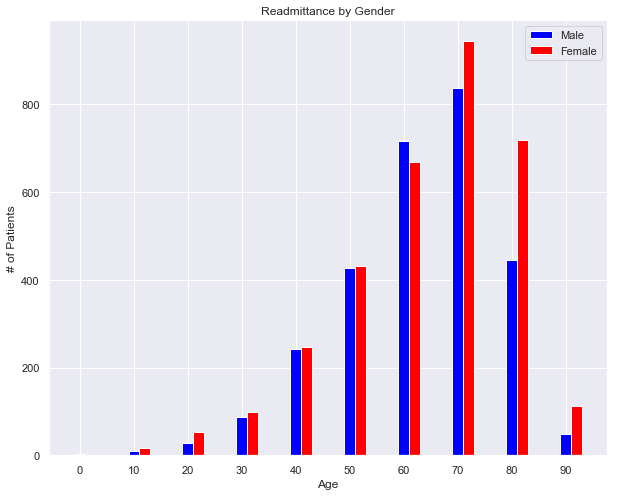

In [37]:
# Readmittance by Gender 
# define male/female dataframes
fig = plt.figure(figsize=(10,8))


male = df[(df['gender'] == 'Male')]
female = df[(df['gender'] == 'Female')]
# set x/y values
ax = plt.subplot()
x = list(df['age'].unique())
y1 = list(male.loc[(male['readmitted'] == 1)].groupby(['age', 'readmitted'])['patient_nbr'].count())
y2 = list(female.loc[(female['readmitted'] == 1)].groupby(['age', 'readmitted'])['patient_nbr'].count())
# plot bar graph
width = 2
plt.bar(x, y1, width = 2, color = 'blue')
plt.bar([i + width for i in x], y2, width = 2, color = 'red')
# set graph labels
plt.xticks(np.arange(0, 100, step=10))
plt.title('Readmittance by Gender')
plt.xlabel('Age')
plt.ylabel('# of Patients')
plt.legend(['Male', 'Female'])
plt.show()

In [38]:
women = df.loc[df.gender.isin(['Female'])]
men = df.loc[df.gender.isin(['Male'])]
type(men)

pandas.core.frame.DataFrame

In [39]:
women.loc[:,'age':'age'].describe()


,age
count,36262.000000
mean,61.226353
std,16.617669
min,0.000000
25%,50.000000
50%,60.000000
75%,70.000000
max,90.000000


In [ ]:
men.loc[:,'age':'age'].describe()

In [ ]:
race_dict= {'Caucasian': 1, 'AfricanAmerican': 2, 'Hispanic': 3, 'Asian': 4, 'Other': 5}

df['race_int'] = df['race'].map(race_dict)

In [ ]:
df.race_int.value_counts(normalize=True)


In [ ]:
fig = plt.figure(figsize= (12, 8))
sns.distplot(df.race_int)

ax = plt.axes()

ax.set_title('Distribution of Races')
plt.ylabel('Overall Percentage')
plt.xlabel('Race')
# plt.yticks(np.arange(0, 10, step = 1))



In [ ]:
plt.figure(figsize=(12,8))
x = ['Caucasian', 'African American','Hispanic', 'Asian', 'Other']
y = [76.8, 18.5, 2.2, 1.6, .07]

plt.bar(x,y)
plt.title('Distribution of Races')
plt.xlabel('Races')
plt.ylabel('Percentage of Population')

In [ ]:
# Readmittance by Medication Change 
fig = plt.figure(figsize=(12,8))
# set x/y values
ax = plt.subplot()
x = list(df['medchange'].unique())
y1 = list(df.loc[(df['readmitted'] == 1)].groupby(['medchange', 'readmitted'])['patient_nbr'].count())
# insert missing value to fix shape error
y1.insert(4,0)
# plot bar graph
plt.bar(x, y1, color = 'green')
# set graph labels
plt.xticks(np.arange(0, 5, step=1))
plt.title('Readmittance by Medication Change')
plt.xlabel('# of Medication Changes')
plt.ylabel('# of Patients')
plt.legend(['Readmitted Patients'])
plt.show()
